In [1]:
from FinMind.data import DataLoader
import numpy as np
import talib
api = DataLoader()
df = api.taiwan_stock_daily(
    stock_id="TAIEX",
    start_date='2012-12-01',
    end_date='2021-12-02'
)

//anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
from talib.abstract import *

In [3]:
df = df[["date","open","max","min","close","Trading_Volume"]]

In [4]:
close_array = np.array(df['close'])
label = []
for i in range(len(close_array)):
    tmp_value = close_array[i]
    label_1 = tmp_value * 1.04
    label_2 = tmp_value * 0.98
    if(i >= (len(close_array)-20)):
        epoch_j = len(close_array) - i
    else:
        epoch_j = 21
    for j in range(epoch_j):
        if(close_array[i+j] >= label_1):
            label.append(int(1))
            break
        elif(close_array[i+j] <= label_2):
            label.append(int(2))
            break
    if(len(label) != (i+1)):
        if(epoch_j != 21):
            label.append(np.nan)
        else:
            label.append(int(0))
df['label'] = label

In [5]:
output = MA(df['close'], timeperiod=5)
BMA_5 = []
for i in range(len(df['close'])):
    BMA_5.append((df['close'][i] - output[i])/output[i])
df['5daysBMA'] = BMA_5

In [6]:
output = MA(df['close'], timeperiod=10)
BMA_10 = []
for i in range(len(df['close'])):
    BMA_10.append((df['close'][i] - output[i])/output[i])
df['10daysBMA'] = BMA_10

In [7]:
output = MA(df['close'], timeperiod=20)
BMA_20 = []
for i in range(len(df['close'])):
    BMA_20.append((df['close'][i] - output[i])/output[i])
df['20daysBMA'] = BMA_20

In [8]:
output = MA(df['close'], timeperiod=60)
BMA_60 = []
for i in range(len(df['close'])):
    BMA_60.append((df['close'][i] - output[i])/output[i])
df['60daysBMA'] = BMA_60

In [9]:
df['RSI'] = RSI(df['close'], period=14)

In [10]:
df['MACD'],df['MACDsignal'],df['MACDhist'] = MACD(df['close'])

In [11]:
df.to_csv("dataset.csv",index=False)

In [12]:
import pandas as pd
df = pd.read_csv("dataset.csv")

In [14]:
df = df.dropna()

In [15]:
df

,date,open,max,min,close,Trading_Volume,label,5daysBMA,10daysBMA,20daysBMA,60daysBMA,RSI,MACD,MACDsignal,MACDhist
59,2013-03-06,7958.11,7982.39,7936.86,7950.30,3923678149,0.0,0.003497,0.002135,0.004302,0.024105,56.429268,43.544898,51.947231,-8.402333
60,2013-03-07,7950.90,7984.29,7942.37,7960.51,3629314119,2.0,0.003202,0.003384,0.004586,0.024626,57.172977,43.431253,50.244035,-6.812782
61,2013-03-08,7981.00,8029.14,7981.00,8015.14,4161212736,2.0,0.008803,0.009412,0.010319,0.030742,61.008046,47.205221,49.636272,-2.431051
62,2013-03-11,8021.88,8089.21,8001.85,8038.72,4284798782,2.0,0.007425,0.011721,0.012088,0.032912,62.566221,51.505108,50.010039,1.495069
63,2013-03-12,8039.00,8063.23,7986.59,7994.71,4200531442,2.0,0.000355,0.005587,0.005668,0.026441,57.914429,50.776243,50.163280,0.612963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,2021-11-16,17639.96,17708.10,17629.80,17693.13,8855573631,2.0,0.006917,0.015024,0.028237,0.036045,70.202960,189.168001,129.477847,59.690154
2195,2021-11-17,17705.29,17764.04,17669.58,17764.04,9046216805,2.0,0.008607,0.015353,0.029736,0.038755,71.865814,203.814901,144.345258,59.469643
2196,2021-11-18,17767.06,17841.37,17748.21,17841.37,9921581700,2.0,0.008544,0.015348,0.031374,0.042160,73.596310,219.136490,159.303504,59.832986
2197,2021-11-19,17864.19,17986.18,17786.05,17818.31,9158530889,2.0,0.003834,0.011035,0.027280,0.039801,72.170724,226.803758,172.803555,54.000203


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

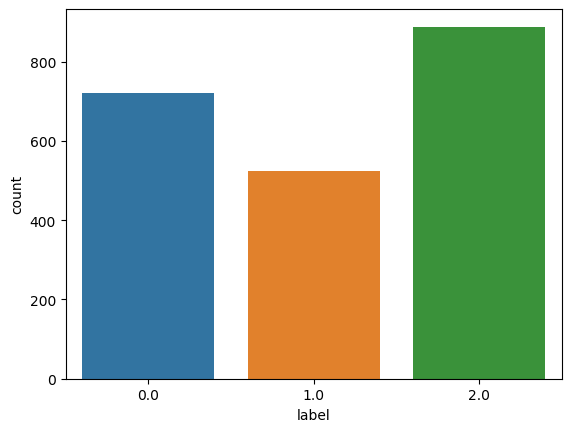

In [25]:
sns.countplot(x='label', data=df)
plt.show()

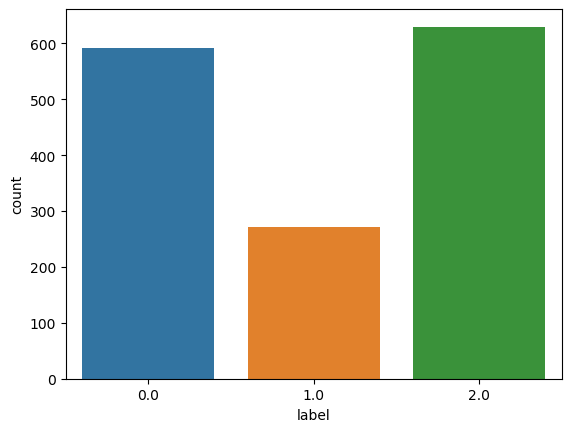

In [26]:
sns.countplot(x='label', data=df.iloc[0:int(2133 * 0.7)])
plt.show()

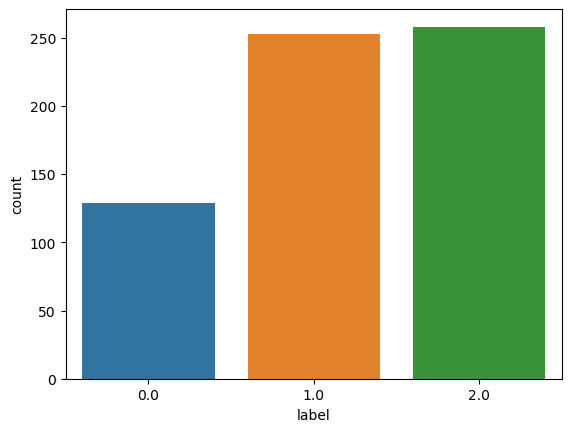

In [27]:
sns.countplot(x='label', data=df.iloc[int(2133 * 0.7):])
plt.show()

In [43]:
X_train = df.iloc[0:int(2133 * 0.7)].drop(columns=['date','label'])
y_train = df.iloc[0:int(2133 * 0.7)]['label']
param_grid = { 
    'bootstrap':[True],
    'n_estimators': [100, 200,300,1000],
    'max_features': [2,3],
    'max_depth': [80,90,100,110],
    'min_samples_leaf': [3,4,5],
    'min_samples_split': [8,10,12]
}
rfc=RandomForestClassifier(random_state=0)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv = 3)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [44]:
CV_rfc.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 200}

In [47]:
CV_rfc.best_score_

0.3818210467625027

In [74]:
X_test = df.iloc[int(2133 * 0.7):].drop(columns=['date','label'])
y_test = df.iloc[int(2133 * 0.7):]['label'].to_numpy()

In [75]:
ans = CV_rfc.predict(X_test)
cnt = 0
for i in range(len(y_test)):
    if(y_test[i] == ans[i]):
        cnt+=1
cnt/len(y_test)

0.4578125

In [76]:
from sklearn.preprocessing import label_binarize
y_test = label_binarize(y_test, classes=[0,1,2])
y_score = CV_rfc.predict_proba(X_test)

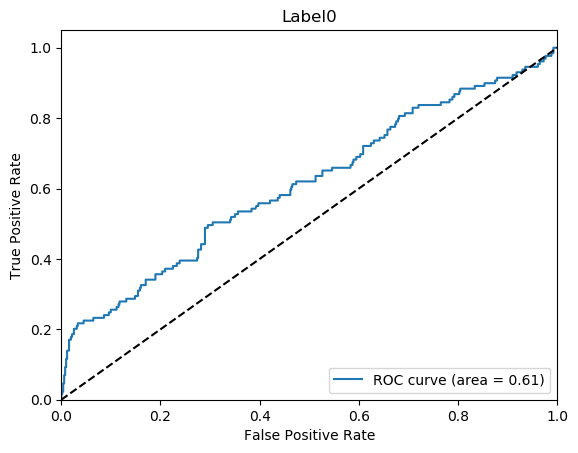

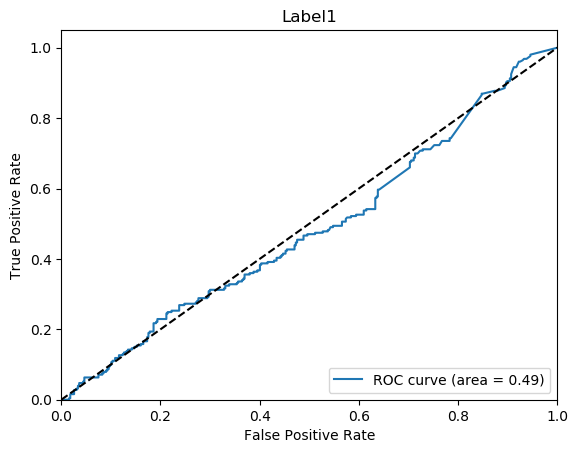

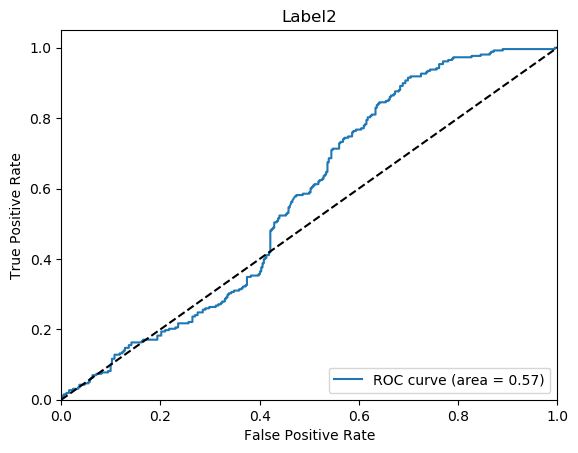

In [77]:
import numpy as np
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Label' + str(i))
    plt.legend(loc="lower right")
    plt.show()